In [1]:
from sklearn.model_selection import train_test_split #For reasons beyond the ken of mortal man, this needs to be loaded first or it will fail. Might be TF that it needs to be loaded before.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [14]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
#from sklearn.model_selection import train_test_split
#import sklearn
from matplotlib.ticker import MaxNLocator #Able to force plots to use integer ticks only.

from tensorflow import keras
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import concatenate



In [15]:
def plot_learning_curve(history):
      fig, ax = plt.subplots(1, 2, figsize=(12, 4))
      ax[0].plot(history['loss'], label='training')
      ax[0].plot(history['val_loss'], label='validation')
      ax[0].set_title("Model losses")
      ax[0].set_xlabel("Epoch")
      ax[0].set_ylabel("Loss")
      #ax[0].set_yscale('log')
      ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
      ax[0].legend()

      ax[1].plot(history['accuracy'], label='training')
      ax[1].plot(history['val_accuracy'], label='validation')
      ax[1].set_title("Model accuracy")
      ax[1].set_xlabel("Epoch")
      ax[1].set_ylabel("Accuracy")
      ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
      ax[1].legend()
      plt.show()


tot = 0
q = [1,2,3,4]
for i in q:
  tot=i+tot

print(tot)

10


In [1]:
!ls "/content/drive/My Drive/Colab Notebooks/"
adc = np.load("/content/drive/My Drive/Colab Notebooks/g4sbs_kin7_pmt_edep_preprocessed.npy")
tdc = np.load("/content/drive/My Drive/Colab Notebooks/g4sbs_kin7_tavg_preprocessed.npy")
hits = np.load("/content/drive/My Drive/Colab Notebooks/g4sbs_kin7_fnucl.npy")

#print(adc[0])
#print('adc matrix = ', adc)
print('adc.shape = ', adc.shape)
adc = np.reshape(adc, (adc.shape[0], 24, 12, 1))
print('adc.shape = ', adc.shape)
print('tdc.shape = ', tdc.shape)
tdc = np.reshape(tdc, (tdc.shape[0], 24, 12, 1))
print('tdc.shape = ', tdc.shape)
print('hits matrix = ', hits)
print('hits.shape = ', hits.shape)

ls: cannot access /content/drive/My Drive/Colab Notebooks/: No such file or directory


NameError: name 'np' is not defined

In [17]:
#Split data into training and test.

adc_train, adc_test, tdc_train, tdc_test, hits_train, hits_test = train_test_split(adc, tdc, hits, test_size=0.20)

print('adc_train.shape, adc_test.shape = ', adc_train.shape, adc_test.shape)
print('tdc_train.shape, tdc_test.shape = ', tdc_train.shape, tdc_test.shape)
print('hits_train.shape, hits_test.shape = ', hits_train.shape, hits_test.shape)
#print(adc_train[2])

unique, counts = np.unique(hits_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Counts = ', counts)

adc_train.shape, adc_test.shape =  (400000, 24, 12, 1) (100000, 24, 12, 1)
tdc_train.shape, tdc_test.shape =  (400000, 24, 12, 1) (100000, 24, 12, 1)
hits_train.shape, hits_test.shape =  (400000,) (100000,)
Counts =  {0: 200108, 1: 199892}


In [29]:
model = Sequential() #Define the model object

model.add(Conv2D(filters=64,kernel_size=6,activation='relu',input_shape=adc.shape[1:]))#Shape of a single image.
model.add(MaxPooling2D(1,1))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizer_adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])
"""
model = tf.keras.Sequential() #Define the model object

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=6,activation='relu',input_shape=adc.shape[1:]))#Shape of a single image.
model.add(tf.keras.layers.MaxPool2D(1,1))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
"""

"""
#Dense NN (not CNN layers).
model.add(tf.keras.layers.Dense(128, input_shape=(144,), activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
#model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1))
"""

#model.compile(tf.keras.optimizers.Adam(lr=0.01),loss=tf.keras.losses.CategoricalCrossentropy()) #Adam optimizer and mean squared error loss
#model.compile(tf.keras.optimizers.Adam(lr=0.0001),loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

#Print summary of model.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 19, 7, 64)         2368      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 19, 7, 64)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 19, 7, 64)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8512)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               1089664   
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

In [7]:
#results = model.fit(adc_train, hits_train, epochs=10, batch_size=64, validation_split=0.05)
results = model.fit(tdc_train, hits_train, epochs=10, batch_size=64, validation_split=0.25)

#prediction = model.predict()
#scores = model.evaluate(adc_test, hits_test)
scores = model.evaluate(tdc_test, hits_test)

Epoch 1/10
4688/4688 [==============================] - 30s 6ms/step - loss: 0.6904 - accuracy: 0.5281 - val_loss: 0.6901 - val_accuracy: 0.5309
Epoch 2/10
4688/4688 [==============================] - 30s 6ms/step - loss: 0.6894 - accuracy: 0.5324 - val_loss: 0.6899 - val_accuracy: 0.5315
Epoch 3/10
4688/4688 [==============================] - 29s 6ms/step - loss: 0.6890 - accuracy: 0.5335 - val_loss: 0.6900 - val_accuracy: 0.5299
Epoch 4/10
4688/4688 [==============================] - 29s 6ms/step - loss: 0.6885 - accuracy: 0.5365 - val_loss: 0.6903 - val_accuracy: 0.5312
Epoch 5/10
4688/4688 [==============================] - 29s 6ms/step - loss: 0.6879 - accuracy: 0.5387 - val_loss: 0.6903 - val_accuracy: 0.5290
Epoch 6/10
4688/4688 [==============================] - 29s 6ms/step - loss: 0.6870 - accuracy: 0.5422 - val_loss: 0.6913 - val_accuracy: 0.5275
Epoch 7/10
4688/4688 [==============================] - 30s 6ms/step - loss: 0.6855 - accuracy: 0.5472 - val_loss: 0.6924 - val_ac

test loss, test acc: [0.6972454786300659, 0.5227199792861938]


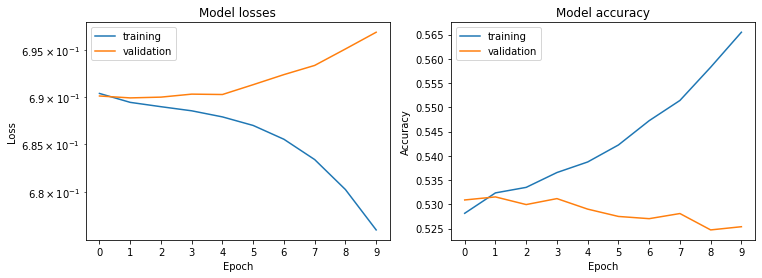

In [8]:
print("test loss, test acc:", scores)

plot_learning_curve(results.history)

In [47]:
# define two sets of inputs
print(adc.shape[1:])
inputA = Input(shape=(24,12,1))
inputB = Input(shape=(24,12,1))

# the first branch operates on the first input
x = Conv2D(filters=64,kernel_size=6,activation='relu',input_shape=adc.shape[1:])(inputA)#Shape of a single image.
x = MaxPooling2D(1,1)(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# the second branch opreates on the second input
y = Conv2D(filters=64,kernel_size=6,activation='relu',input_shape=tdc.shape[1:])(inputB)#Shape of a single image.
y = MaxPooling2D(1,1)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(128, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(32, activation="relu")(combined)
z = Dense(1, activation="sigmoid")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
opt = keras.optimizers.Adam(learning_rate=0.0005)#Default lr=0.001
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

(24, 12, 1)
Model: "functional_89"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 24, 12, 1)]  0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           [(None, 24, 12, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 19, 7, 64)    2368        input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 19, 7, 64)    2368        input_30[0][0]                   
__________________________________________________________________________

In [48]:
results = model.fit([adc_train, tdc_train], hits_train, epochs=10, batch_size=64, validation_split=0.25)
scores = model.evaluate([adc_test,tdc_test], hits_test)

Epoch 1/10
4688/4688 [==============================] - 39s 8ms/step - loss: 0.6886 - accuracy: 0.5297 - val_loss: 0.6873 - val_accuracy: 0.5338
Epoch 2/10
4688/4688 [==============================] - 38s 8ms/step - loss: 0.6873 - accuracy: 0.5342 - val_loss: 0.6869 - val_accuracy: 0.5365
Epoch 3/10
4688/4688 [==============================] - 38s 8ms/step - loss: 0.6863 - accuracy: 0.5386 - val_loss: 0.6875 - val_accuracy: 0.5362
Epoch 4/10
4688/4688 [==============================] - 38s 8ms/step - loss: 0.6855 - accuracy: 0.5409 - val_loss: 0.6870 - val_accuracy: 0.5364
Epoch 5/10
4688/4688 [==============================] - 39s 8ms/step - loss: 0.6842 - accuracy: 0.5456 - val_loss: 0.6872 - val_accuracy: 0.5346
Epoch 6/10
4688/4688 [==============================] - 39s 8ms/step - loss: 0.6823 - accuracy: 0.5508 - val_loss: 0.6882 - val_accuracy: 0.5337
Epoch 7/10
4688/4688 [==============================] - 38s 8ms/step - loss: 0.6795 - accuracy: 0.5573 - val_loss: 0.6904 - val_ac

test loss, test acc: [0.69709712266922, 0.5275700092315674]


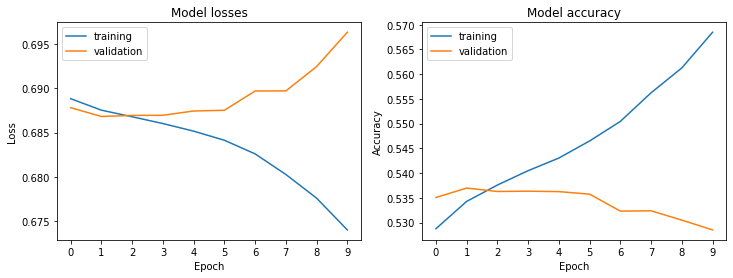

In [28]:
print("test loss, test acc:", scores)

plot_learning_curve(results.history)